## EDA - easyOCR

Purpose: To investigate the utility in using easyOCR to identify odometer distances

Context: Tesseract didnt work and easyOCR seems like the next most commonly used tool. 

In [1]:
# imports
import easyocr
import cv2
import matplotlib.pyplot as plt
from typing import List
import os
import re
import json

In [8]:
# Initialize EasyOCR reader
reader = easyocr.Reader(
    ["en"],
    gpu=True
)  # this needs to run only once to load the model into memory

# sucks that they havent implemented MPS for torch yet :(

In [2]:
def resize(image, width):
    h, w = image.shape[:2]
    if w>h:
        new_w = width
        new_h = int(new_w * h / w)
    else:
        new_h = width
        new_w = int(new_h * w / h)
    return cv2.resize(image, (new_w, new_h))

In [18]:
def draw_rects(image, result):
    # takes the result from easyOCR
    orig = image.copy()

    # loop over the bounding boxes
    for box, value, conf in result:
        top_left, _, btm_right, _ = box
        cv2.rectangle(
            orig,
            (int(top_left[0]), int(top_left[1])),
            (int(btm_right[0]), int(btm_right[1])),
            (0, 255, 0),
            2,
        )
    return orig

In [17]:
def get_most_likly_odo(results):
    odo = "-1"
    for _, value, conf in results:
        value = cvt_to_int(value)
        if conf > 0.85 and len(value) >= 4 and len(value) < 7:
            if int(odo) < int(value):
                odo = value
    return int(odo)

def cvt_to_int(text):
    return re.sub(r"\D+", "", text)

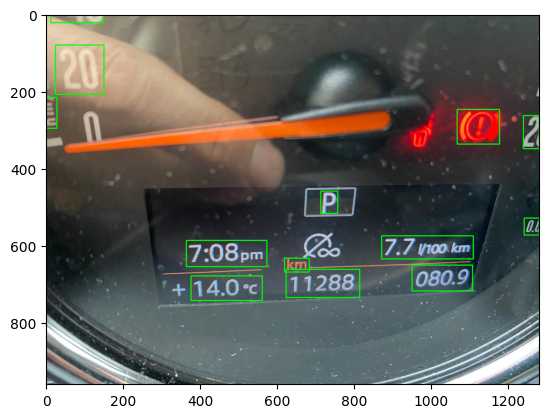

11288

In [41]:
image = cv2.imread(
    "/Users/roanraina/LOCAL/ICBC/ICBC-Odometer-Recognition/tmp/processed_April 2021_229.jpg"
)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

resized_img = resize(image, 1280)

result = reader.readtext(resized_img)

image_seg = draw_rects(resized_img, result)

plt.imshow(image_seg)
plt.show()

get_most_likly_odo(result)

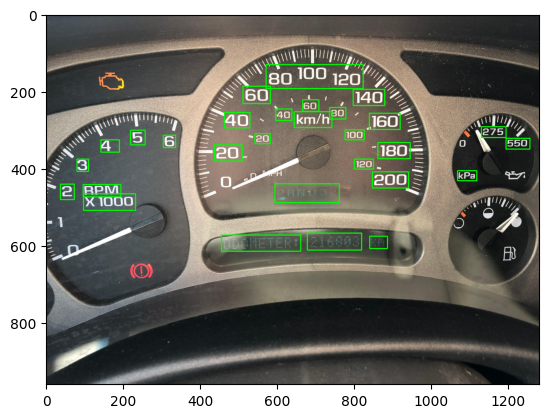

216803

In [43]:
image = cv2.imread(
    "/Users/roanraina/LOCAL/ICBC/ICBC-Odometer-Recognition/tmp/processed_April_2019_41.jpg"
)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

resized_img = resize(image, 1280)

result = reader.readtext(resized_img)

image_seg = draw_rects(resized_img, result)

plt.imshow(image_seg)
plt.show()

get_most_likly_odo(result)

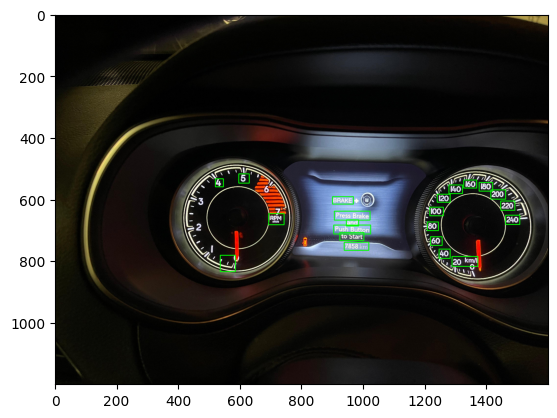

7858

In [46]:
image = cv2.imread(
    "/Users/roanraina/LOCAL/ICBC/ICBC-Odometer-Recognition/tmp/processed_BEU Completed_1.jpg"
)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

resized_img = resize(image, 1600)

result = reader.readtext(resized_img)

image_seg = draw_rects(resized_img, result)

plt.imshow(image_seg)
plt.show()

get_most_likly_odo(result)

(4000, 3000)


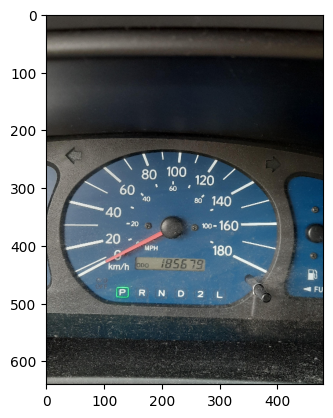

In [6]:
image = cv2.imread(
    "/Users/roanraina/LOCAL/ICBC/ICBC-Odometer-Recognition/tmp/processed_April 2021_104.jpg"
)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape[:2])

resized_img = resize(image, 640)

result = reader.readtext(resized_img)

image_seg = draw_rects(resized_img, result)

plt.imshow(image_seg)
plt.show()

get_most_likly_odo(result)

Yooooooo that looks soooo goooodddddddd!!!!!! Takes a long time, but it works in every case!

Once we get a test set from ICBC, we can test it out on a larger number of images. 

We will need to find a temporary way of selecting the right number. Maybe thats just choosing the highest confidence number with 5 or 6 digits. 

In [23]:
# Define the path to the main directory containing the subdirectories with photos
main_dir = '../../tmp/UBCMDSCapstone/Photos 3 copy/'

results_dict = {}
# Iterate through each file in the subdirectory
for filename in os.listdir(main_dir):
    file_path = os.path.join(main_dir, filename)

    # Check if the file is an image (assuming all image files have extension '.jpg')
    if filename.endswith('.jpg'):

        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        resized_img = resize(image, 640)

        result = reader.readtext(resized_img)

        results_dict[file_path] = get_most_likly_odo(result)


In [26]:
results_dict
count = 0
for key, value in results_dict.items():
    if value != -1:
        count+=1

print("% identified " + str(count/len(results_dict)))

# Write the JSON string to a file
with open("results_640", 'w') as f:
    f.write(json.dumps(results_dict))

% identified 0.24691358024691357


In [27]:
results_1600
count = 0
for key, value in results_1600.items():
    if value != -1:
        count+=1

print("% identified " + str(count/len(results_1600)))

# Write the JSON string to a file
with open("results_1600", 'w') as f:
    f.write(json.dumps(results_1600))

% identified 0.2777777777777778


In [28]:
results_original
count = 0
for key, value in results_original.items():
    if value != -1:
        count+=1

print("% identified " + str(count/len(results_original)))

# Write the JSON string to a file
with open("results_original", 'w') as f:
    f.write(json.dumps(results_1600))

% identified 0.32098765432098764


(1704, 2200)


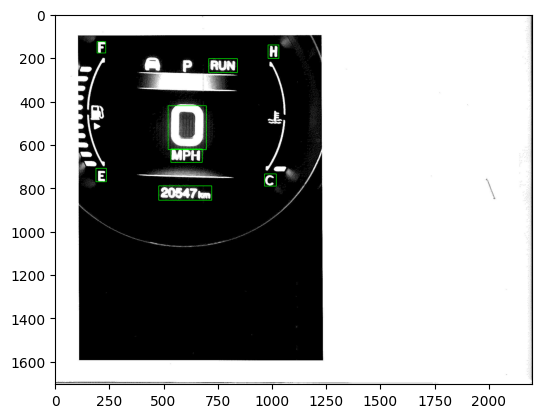

-1

In [24]:
# High contrast images


image = cv2.imread(
    "/Users/roanraina/LOCAL/ICBC/ICBC-Odometer-Recognition/tmp/UBCMDSCapstone/Photos_1/processed_BEU Completed_2620.jpg"
)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape[:2])

result = reader.readtext(image)

image_seg = draw_rects(image, result)

plt.imshow(image_seg)
plt.show()

get_most_likly_odo(result)

(1932, 2576)


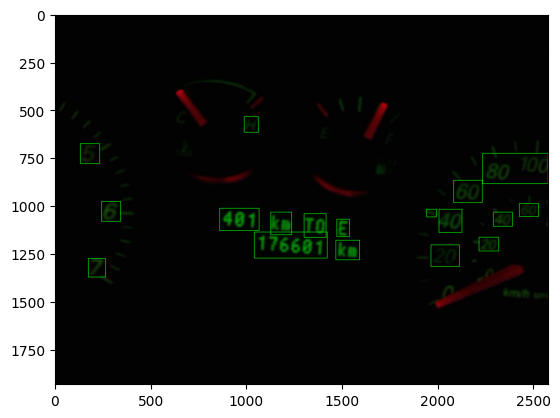

176601

In [25]:
# low contrast images


image = cv2.imread(
    "/Users/roanraina/LOCAL/ICBC/ICBC-Odometer-Recognition/tmp/UBCMDSCapstone/Photos_1/processed_BEU Completed_3401.jpg"
)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape[:2])

result = reader.readtext(image)

image_seg = draw_rects(image, result)

plt.imshow(image_seg)
plt.show()

get_most_likly_odo(result)